## CAMERA CALIBRATION

Camera Calibrated!


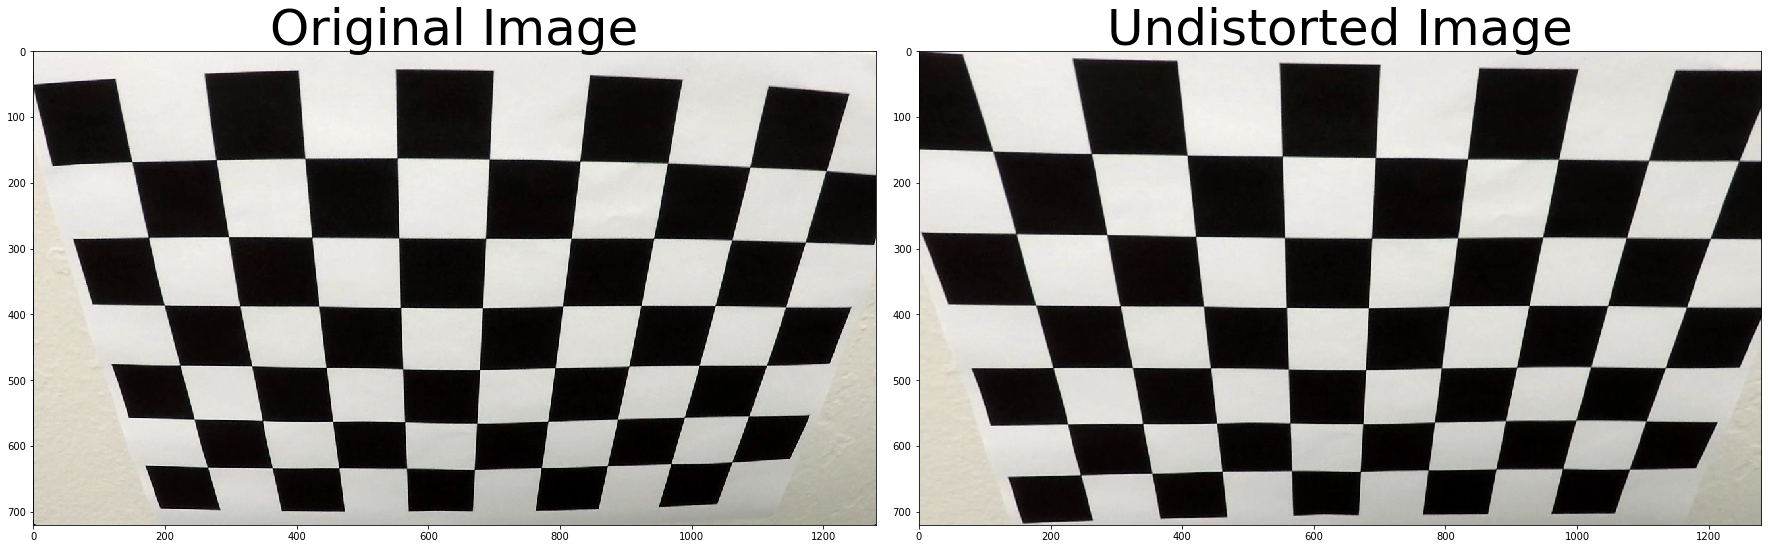

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

#use glob to import all calibration images as "images"
images = glob.glob("camera_cal\\calibration*.jpg")

#establish empty vectors for final compiled lists of object points and image points
objpoints = [] # 3D points in real world space (z=0)
imgpoints = [] # 2D points in image plane

#loop image by image
for fname in images:

    # Read in next calibration image from "images"
    img = mpimg.imread(fname)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    # Assume that there are 6x9 corners in the image. - Find Corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    # initialize and populate an object points matrix of same dimensions to match
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

    # if those corners WERE found, add image points (found corners) and initialized object points to master list
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

    # If corner finding fails (because 1 row of corners is outside the image)
    # re-try corner finding for 5x9 corners, with objpt mx appropriately resized
    else: 
        ret, corners = cv2.findChessboardCorners(gray, (9,5), None)
      
        # if those corners WERE found, add image points (found corners) and initialized object points to master list
        if ret == True:
            objp = np.zeros((5*9,3), np.float32)
            objp[:,:2] = np.mgrid[0:9, 0:5].T.reshape(-1,2)
            imgpoints.append(corners)
            objpoints.append(objp)


# CAMERA CALIBRATION USING COMPLETED MASTER LISTS OF OBJECT POINTS AND IMAGE POINTS
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
print("Camera Calibrated!")

# Import example image (2) to test calibration
img = mpimg.imread("camera_cal\\calibration2.jpg")

# Undistort example
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Write undistorted image to file
cv2.imwrite("output_images\\Undistorted Chessboard.png", dst)

# Display original and undistorted versions side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## PIPELINE: Undistort Test Image

True

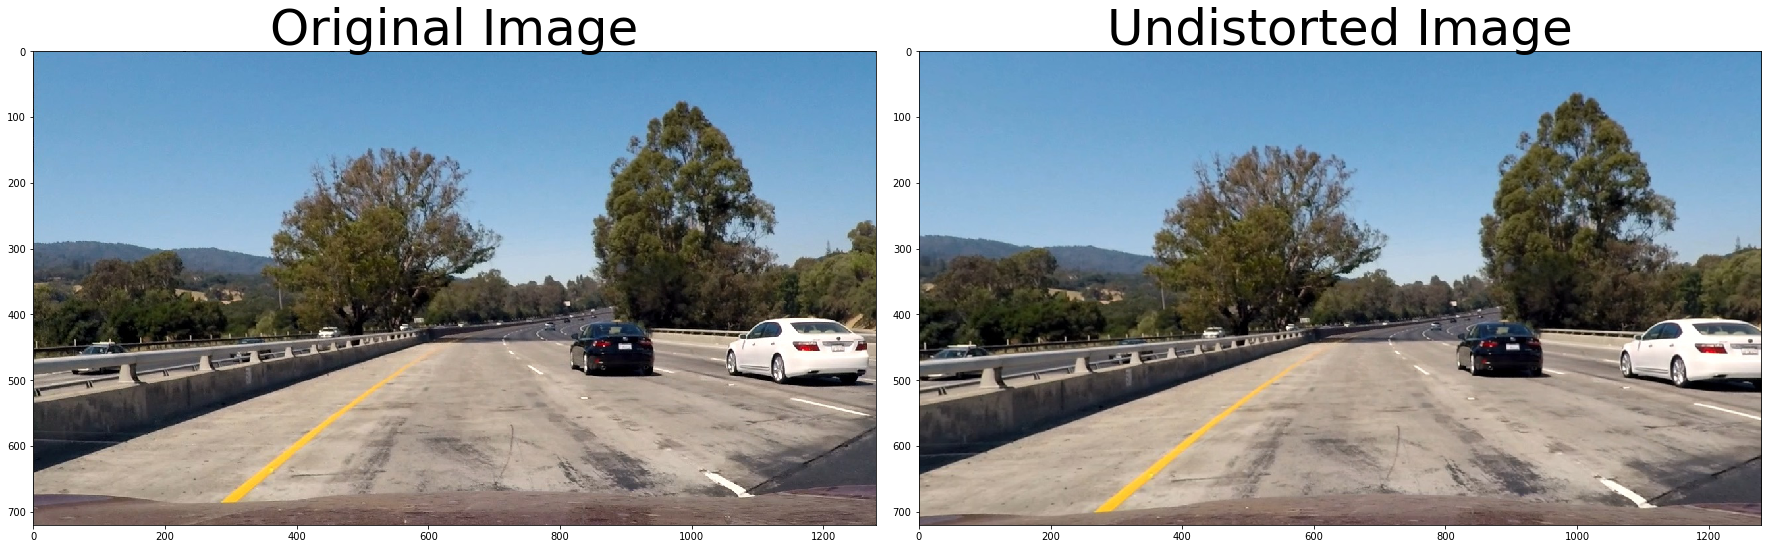

In [2]:
# Example Undistort 

img = mpimg.imread("test_images\\test1.jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

# Display original and undistorted versions side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


# Write undistorted image to file
dstc = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
cv2.imwrite("output_images\\Undistorted Test Image.png", dstc)

## Pipeline: Create Binary Image 

True

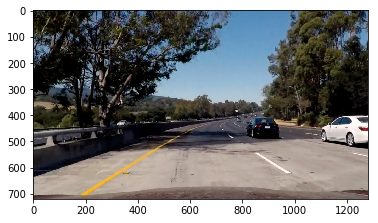

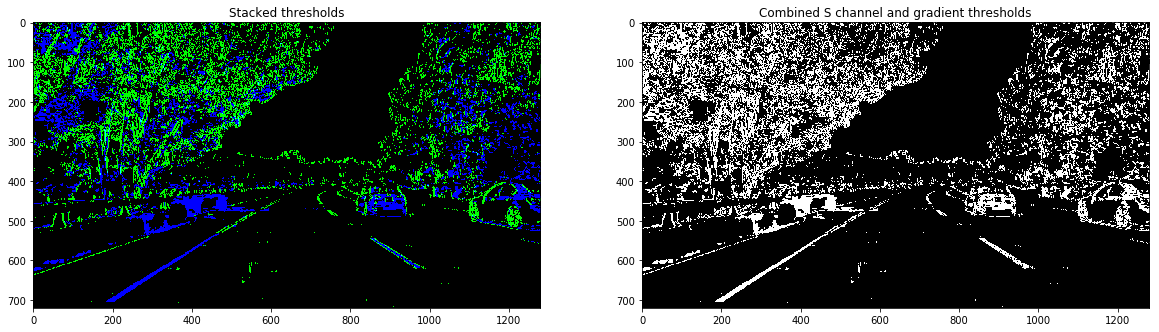

In [3]:

img = mpimg.imread("test_images\\test5.jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)

# SOBEL X GRADIENT - output = sxbinary
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
abs_sobelx = np.absolute(sobelx)
scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
xthresh_min = 20
xthresh_max = 150
sxbinary = np.zeros_like(scaled_sobelx)
sxbinary[(scaled_sobelx >= xthresh_min) & (scaled_sobelx <= xthresh_max)] = 1
#plt.imshow(sxbinary, cmap='gray')

# # SOBEL Y GRADIENT - output = sybinary
# sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
# abs_sobely = np.absolute(sobely)
# scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
# ythresh_min = 20
# ythresh_max = 100
# sybinary = np.zeros_like(scaled_sobely)
# sybinary[(scaled_sobely >= ythresh_min) & (scaled_sobely <= ythresh_max)] = 1
# #plt.imshow(sybinary, cmap='gray')

# # GRADIENT MAGNITUDE - output = binary_output_mag
# gradmag = np.sqrt(sobelx**2 + sobely**2)
# scale_factor = np.max(gradmag)/255
# gradmag = (gradmag/scale_factor).astype(np.uint8)
# magthresh_min = 55
# magthresh_max = 150
# binary_output_mag = np.zeros_like(gradmag)
# binary_output_mag[(gradmag >= magthresh_min) & (gradmag <= magthresh_max)] = 1
# #plt.imshow(binary_output_mag, cmap='gray')

# # GRADIENT DIRECTION - output = binary_output_dir
# sobel_kernel=31
# sobelxk = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
# sobelyk = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
# absgraddir = np.arctan2(np.absolute(sobelyk), np.absolute(sobelxk))
# dirthresh_min = .6
# dirthresh_max = 1.2
# binary_output_dir =  np.zeros_like(absgraddir)
# binary_output_dir[(absgraddir >= dirthresh_min) & (absgraddir <= dirthresh_max)] = 1
# #plt.imshow(binary_output_dir, cmap='gray')

# HLS COLOR THRESHOLDING - ouput = s_binary
hls = cv2.cvtColor(dst, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]
s_thresh_min = 170
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
#plt.imshow(s_binary, cmap='gray')

# Combine multiple thresholdings
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
#plt.imshow(combined_binary, cmap='gray')

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack((np.zeros_like(sxbinary), sxbinary*255, s_binary*255))

# Plotting thresholded images
plt.imshow(dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds')
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and gradient thresholds')
ax2.imshow(combined_binary, cmap='gray')

combined_binary_colors = np.zeros_like(color_binary)
combined_binary_colors = np.dstack((combined_binary*255, combined_binary*255, combined_binary*255))

# Write images to file
color_binaryc = cv2.cvtColor(color_binary, cv2.COLOR_BGR2RGB)
cv2.imwrite("output_images\\Color Binary.png", color_binaryc)
cv2.imwrite("output_images\\Combined Binary.png", combined_binary_colors)

## Pipeline: Perspective Transform

True

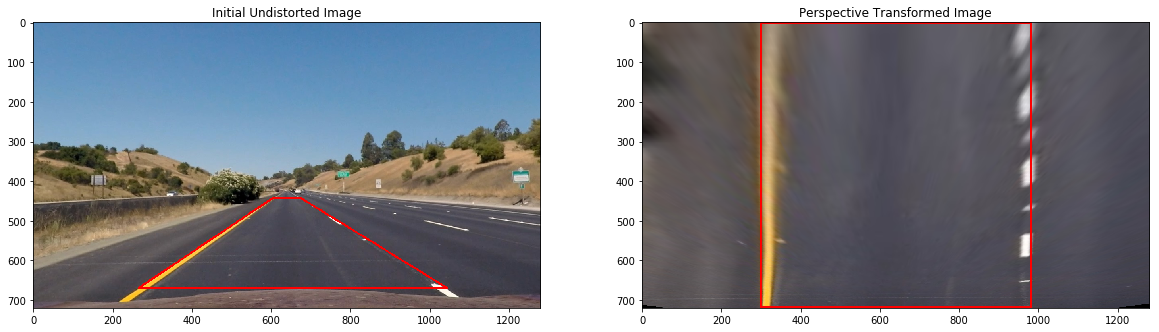

In [4]:
image = mpimg.imread("test_images\\straight_lines1.jpg")

dest = cv2.undistort(image, mtx, dist, None, mtx)

# manually define source and destination points
src = np.float32([[266,669],[604,443],[674,443],[1043,669]])
dst = np.float32([[300,720],[300,0],[980,0],[980,720]])

# get transformation matrix
M = cv2.getPerspectiveTransform(src, dst)

# use transformation to get a warped image
warped = cv2.warpPerspective(dest, M, (1280,720), flags=cv2.INTER_LINEAR)

# draw polygons to demonstrate transformed areas
src_for_draw = np.array([[266,669],[603,443],[675,443],[1043,669]], np.int32)
src_for_draw = src_for_draw.reshape((-1,1,2))
dst_for_draw = np.array([[300,718],[300,2],[980,2],[980,718]], np.int32)
dst_for_draw = dst_for_draw.reshape((-1,1,2))
inittrap = cv2.polylines(dest,[src_for_draw],True,(255,0,0),3)
warpedtrap = cv2.polylines(warped, [dst_for_draw],True,(255,0,0),3)

# plot original and warped images side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Initial Undistorted Image')
ax1.imshow(inittrap)
ax2.set_title('Perspective Transformed Image')
ax2.imshow(warpedtrap)


# Write images to file
inittrapc = cv2.cvtColor(inittrap, cv2.COLOR_BGR2RGB)
warpedtrapc = cv2.cvtColor(warpedtrap, cv2.COLOR_BGR2RGB)
cv2.imwrite("output_images\\Pre Perspective Transform.png", inittrapc)
cv2.imwrite("output_images\\Warped Perspective.png", warpedtrapc)


## Pipeline: Warp Binary Image

In [5]:
warped_bin = cv2.warpPerspective(combined_binary, M, (1280,720), flags=cv2.INTER_LINEAR)

plt.imshow(warped_bin, cmap = 'gray')

## Pipeline: Identify Lane Lines

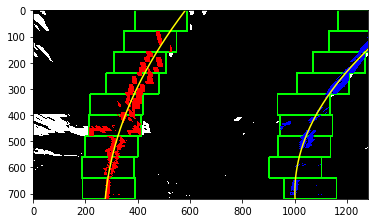

In [6]:
#print(warped_bin.shape)
#plt.imshow(warped_bin, cmap = 'gray')
histogram = np.sum(warped_bin[360:,:], axis=0)
#print(histogram.size)
#plt.hist(histogram)
#print(histogram)

midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

#plt.plot(histogram)
#print(leftx_base)
#print(rightx_base)

out_img = np.dstack((warped_bin, warped_bin, warped_bin))*255

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(warped_bin.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = warped_bin.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = warped_bin.shape[0] - (window+1)*window_height
    win_y_high = warped_bin.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 5) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 5) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
        

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

y_eval = out_img.shape[0]

ym_per_pix = 60/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit a second order polynomial to each in pixel space
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Generate x and y values for plotting using pixel space fit
ploty = np.linspace(0, warped_bin.shape[0]-1, warped_bin.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Fit a second order polynomial to each in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)

# Calculate radiii of curvature using world space fit
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

curve_rad = (left_curverad+right_curverad)/2

left_of_center = ((-1)*(640-(((rightx_base-leftx_base)/2) + leftx_base))*xm_per_pix)
 

#print("Radius of Curvature is {:.5}m".format(curve_rad))
#print("Car is {:.3}m left of center".format(left_of_center))


out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

plt.savefig("output_images\\Found Lines.png")

## Pipeline: Draw Found Lines, Curvature and Offset

In [7]:
img = mpimg.imread("test_images\\test5.jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

Minv = np.linalg.inv(M)

# Create an image to draw the lines on
warp_zero = np.zeros_like(warped_bin).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(dst, 1, newwarp, 0.3, 0)

font = cv2.FONT_HERSHEY_DUPLEX

cv2.putText(result,"Radius of Curvature is {:.5}m".format(curve_rad),(50,75), font, 2,(255,255,255),2)
cv2.putText(result,"Car is {:.3}m left of center".format(left_of_center),(50,150), font, 2,(255,255,255),2)

plt.imshow(result)

resultc = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
cv2.imwrite("output_images\\Full Pipeline Example.png", resultc)

True

## Pipeline: Full combined implementation for video creation

In [8]:
#Define singular pipeline
def process_image(image):
    dst = cv2.undistort(image, mtx, dist, None, mtx)

    gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)

    # SOBEL X GRADIENT - output = sxbinary
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    abs_sobelx = np.absolute(sobelx)
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    xthresh_min = 20
    xthresh_max = 150
    sxbinary = np.zeros_like(scaled_sobelx)
    sxbinary[(scaled_sobelx >= xthresh_min) & (scaled_sobelx <= xthresh_max)] = 1
    #plt.imshow(sxbinary, cmap='gray')

    # HLS COLOR THRESHOLDING - ouput = s_binary
    hls = cv2.cvtColor(dst, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_thresh_min = 170
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    #plt.imshow(s_binary, cmap='gray')

    # Combine multiple thresholdings
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    
    # Warp perspective of combined binary image to top-down view
    warped_bin = cv2.warpPerspective(combined_binary, M, (1280,720), flags=cv2.INTER_LINEAR)
    
    # Check bottom half of image for distribution of hot pixels by column
    histogram = np.sum(warped_bin[360:,:], axis=0)

    # Identify maximum on left and right side respectively    
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[150:midpoint]) + 150
    rightx_base = np.argmax(histogram[midpoint:1130]) + midpoint

#     # Create color image
#     out_img = np.dstack((warped_bin, warped_bin, warped_bin))*255

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(warped_bin.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = warped_bin.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = warped_bin.shape[0] - (window+1)*window_height
        win_y_high = warped_bin.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
#         # Draw the windows on the visualization image
#         cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 5) 
#         cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 5) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))


    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each in pixel space 
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(100, warped_bin.shape[0], warped_bin.shape[0]-99 )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    y_eval = out_img.shape[0]
    
    

    # establish real world distances    
    ym_per_pix = 60/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    # Fit a second order polynomial to each in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)

    # Calculate radiii of curvature using world space fit
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])

    curve_rad = (left_curverad+right_curverad)/2
    curve_rad = curve_rad/10.
    curve_rad = round(curve_rad,0)
    curve_rad = curve_rad*10

    # Calculate position with respect to center
    left_of_center = ((-1)*(640-(((rightx_base-leftx_base)/2) + leftx_base))*xm_per_pix)
    left_of_center = round(left_of_center,1)

    # Calculate inverse of perspective transform matrix
    Minv = np.linalg.inv(M)

    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_bin).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(dst, 1, newwarp, 0.3, 0)

    # Write radius of curvature and lane position onto image
    font = cv2.FONT_HERSHEY_DUPLEX

    cv2.putText(result,"Radius of Curvature is {:.0f}m".format(curve_rad),(50,75), font, 2,(255,255,255),2)
    cv2.putText(result,"Car is {:.3}m left of center".format(left_of_center),(50,150), font, 2,(255,255,255),2)
    
    return result

## Pipeline: Test full implementation 

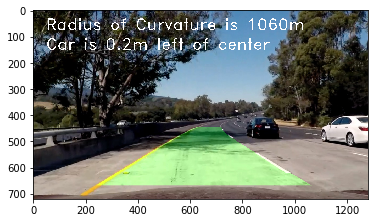

In [9]:
img = mpimg.imread("test_images\\test5.jpg")

pipeline_out = process_image(img)

plt.imshow(pipeline_out)

## Use Full Pipeline to Create Video

In [11]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

counter = 0
basic_output = 'project_video_output_revisedvideo.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")
basic_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time basic_clip.write_videofile(basic_output, audio=False)


[MoviePy] >>>> Building video project_video_output_revisedvideo.mp4
[MoviePy] Writing video project_video_output_revisedvideo.mp4


100%|█████████████████████████████████████▉| 1260/1261 [03:13<00:00,  6.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output_revisedvideo.mp4 

Wall time: 3min 15s
